# Predict Salaries according to position

### Importing Libraries

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Importing Dataset

In [27]:
dataset = pd.read_csv('4_Position_Salaries.csv')
x = dataset.iloc[:,1:-1].values
y = dataset.iloc[:,-1].values
pd.DataFrame(dataset)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [28]:
y = y.reshape(len(y),1)

In [29]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


### Feature Scaling

In [30]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x = sc_x.fit_transform(x)
y = sc_y.fit_transform(y)

In [32]:
print(x)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [33]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


### Training SVR Model (non linear)

In [37]:
from sklearn.svm import SVR
reg = SVR(kernel = 'rbf')
reg.fit(x,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR()

### Predicting new result 

In [35]:
sc_y.inverse_transform(reg.predict(sc_x.transform([[6.5]])))

array([170370.0204065])

### Visualising the result

<function matplotlib.pyplot.show(close=None, block=None)>

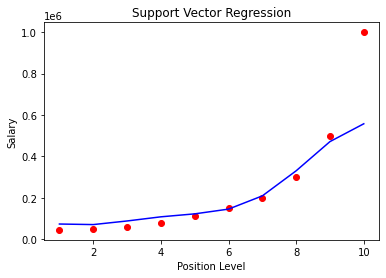

In [36]:
plt.scatter(sc_x.inverse_transform(x),sc_y.inverse_transform(y),color='red')
plt.plot(sc_x.inverse_transform(x),sc_y.inverse_transform(reg.predict(x)),color='blue')
plt.title('Support Vector Regression')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show